In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalSentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(sentimentVector)
    prices.append(price)
    

In [2]:
from imblearn.over_sampling import SMOTE, ADASYN
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
   
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                   

Working on... AAPL
0.15848931924611143
0.01584893192461114
Window: 0
[[166 117]
 [171 112]]
accuracy= 0.4911660777385159
63.0957344480193
0.00039810717055349735
Window: 4
[[234  43]
 [215  73]]
accuracy= 0.5433628318584071
251.18864315095823
0.00039810717055349735
Window: 5
[[253  29]
 [213  70]]
accuracy= 0.5716814159292035
251.18864315095823
0.6309573444801942
Window: 25
[[182 108]
 [180  91]]
accuracy= 0.48663101604278075
0.003981071705534973
0.01584893192461114
Window: 26
[[243  43]
 [181  94]]
accuracy= 0.6007130124777184
10000.0
0.00039810717055349735
Window: 125
[[294   5]
 [227  15]]
accuracy= 0.5711645101663586
10000.0
0.00039810717055349735
Window: 130
[[289   4]
 [237  10]]
accuracy= 0.5537037037037037
251.18864315095797
0.6309573444801942
Window: 250
[[150   5]
 [199 162]]
accuracy= 0.6046511627906976
10000.0
0.00039810717055349735
Window: 260
[[172   0]
 [292  50]]
accuracy= 0.43190661478599224
[0, 0, 0, 0, 0, 72, 72, 216, 216]
[0.4911660777385159, 0.5433628318584071, 0.57

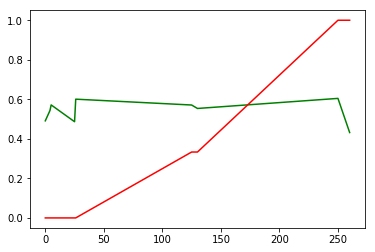

Working on... AMZN
0.15848931924611143
0.00039810717055349735
Window: 0
[[167 100]
 [163 109]]
accuracy= 0.5120593692022264
251.18864315095797
0.6309573444801942
Window: 4
[[108 132]
 [158 140]]
accuracy= 0.46096654275092935
15.848931924611133
0.6309573444801942
Window: 5
[[ 83 156]
 [121 178]]
accuracy= 0.4851301115241636
63.0957344480193
0.6309573444801942
Window: 25
[[ 43 147]
 [112 232]]
accuracy= 0.5149812734082397
15.848931924611133
0.6309573444801942
Window: 26
[[ 38 156]
 [102 238]]
accuracy= 0.5168539325842697
63.0957344480193
1e-05
Window: 125
[[  8 180]
 [ 39 287]]
accuracy= 0.5739299610894941
1.0
25.11886431509582
Window: 130
[[  0 186]
 [  0 327]]
accuracy= 0.6374269005847953
63.0957344480193
25.11886431509582
Window: 250
[[  0 128]
 [  0 361]]
accuracy= 0.7382413087934561
251.18864315095823
25.11886431509582
Window: 260
[[  0 132]
 [  0 355]]
accuracy= 0.728952772073922
[0, 0, 0, 0, 0, 72, 144, 216, 216]
[0.5120593692022264, 0.46096654275092935, 0.4851301115241636, 0.5149

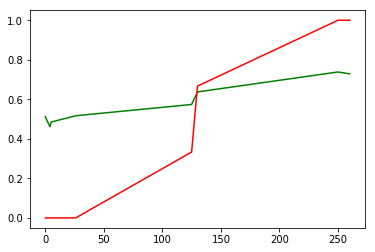

Working on... GOOGL
1000.0
0.01584893192461114
Window: 0
[[117 279]
 [136 266]]
accuracy= 0.4799498746867168
63.0957344480193
0.6309573444801942
Window: 4
[[219 164]
 [230 184]]
accuracy= 0.5056461731493099
15.848931924611133
0.6309573444801942
Window: 5
[[237 140]
 [257 163]]
accuracy= 0.5018820577164367
63.0957344480193
0.01584893192461114
Window: 25
[[ 25 348]
 [ 51 369]]
accuracy= 0.4968474148802018
1000.0
0.00039810717055349735
Window: 26
[[ 52 328]
 [ 54 359]]
accuracy= 0.5182849936948297
10000.0
25.11886431509582
Window: 125
[[  0 375]
 [  0 398]]
accuracy= 0.5148771021992238
15.848931924611133
25.11886431509582
Window: 130
[[  0 377]
 [  0 395]]
accuracy= 0.5116580310880829
15.848931924611133
0.00039810717055349735
Window: 250
[[132 245]
 [115 256]]
accuracy= 0.5187165775401069
15.848931924611133
0.00039810717055349735
Window: 260
[[130 252]
 [104 260]]
accuracy= 0.5227882037533512
[0, 0, 0, 0, 0, 72, 72, 72, 72]
[0.4799498746867168, 0.5056461731493099, 0.5018820577164367, 0.49

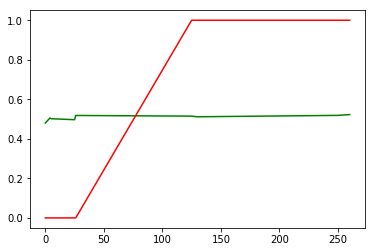

Working on... MSFT
1.0
1e-05
Window: 0
[[258 185]
 [268 198]]
accuracy= 0.5016501650165016
1000.0
0.01584893192461114
Window: 4
[[265 138]
 [338 167]]
accuracy= 0.47577092511013214
1.0
0.00039810717055349735
Window: 5
[[243 160]
 [305 200]]
accuracy= 0.4878854625550661
1000.0
0.01584893192461114
Window: 25
[[ 95 269]
 [151 389]]
accuracy= 0.5353982300884956
1000.0
0.01584893192461114
Window: 26
[[109 248]
 [183 364]]
accuracy= 0.5232300884955752
1.0
1000.0
Window: 125
[[  0 312]
 [  0 572]]
accuracy= 0.6470588235294118
1.0
1000.0
Window: 130
[[  0 302]
 [  0 581]]
accuracy= 0.6579841449603624
1.0
1000.0
Window: 250
[[  0 247]
 [  0 612]]
accuracy= 0.7124563445867288
1.0
1000.0
Window: 260
[[  0 264]
 [  0 593]]
accuracy= 0.691948658109685
[0, 0, 0, 0, 0, 72, 72, 72, 72]
[0.5016501650165016, 0.47577092511013214, 0.4878854625550661, 0.5353982300884956, 0.5232300884955752, 0.6470588235294118, 0.6579841449603624, 0.7124563445867288, 0.691948658109685]
accuracy


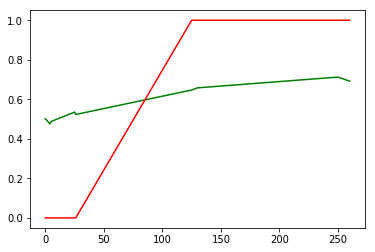

Working on... FB
0.0001
0.6309573444801942
Window: 0
[[131 307]
 [143 325]]
accuracy= 0.5033112582781457
0.003981071705534973
1e-05
Window: 4
[[285 153]
 [303 164]]
accuracy= 0.49613259668508286
0.0001
0.6309573444801942
Window: 5
[[149 292]
 [177 287]]
accuracy= 0.481767955801105
1000.0
0.01584893192461114
Window: 25
[[210 220]
 [229 242]]
accuracy= 0.5016648168701443
15.848931924611133
0.00039810717055349735
Window: 26
[[284 145]
 [282 190]]
accuracy= 0.5260821309655938
0.003981071705534973
1e-05
Window: 125
[[283  95]
 [326 177]]
accuracy= 0.5221339387060159
251.18864315095823
0.01584893192461114
Window: 130
[[341  49]
 [354 136]]
accuracy= 0.5420454545454545
10000.0
0.01584893192461114
Window: 250
[[276 186]
 [148 246]]
accuracy= 0.6098130841121495
15.848931924611133
0.6309573444801942
Window: 260
[[216 252]
 [117 269]]
accuracy= 0.5679156908665105
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5033112582781457, 0.49613259668508286, 0.481767955801105, 0.5016648168701443, 0.5260821309655938, 0.5221

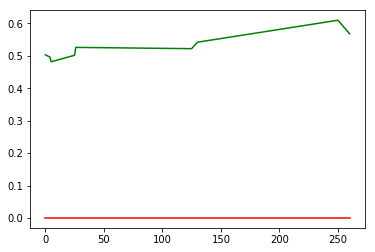

Working on... INTC


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


251.18864315095823
0.01584893192461114
Window: 0
[[255 187]
 [251 216]]
accuracy= 0.5181518151815182
251.18864315095797
0.01584893192461114
Window: 4
[[257 172]
 [264 215]]
accuracy= 0.5198237885462555
3.9810717055349722
0.6309573444801942
Window: 5
[[224 190]
 [291 203]]
accuracy= 0.47026431718061673
6.309573444801943
1e-05


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 25
[[391   0]
 [513   0]]
accuracy= 0.4325221238938053
15.848931924611133
1e-05


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 26
[[384   0]
 [520   0]]
accuracy= 0.4247787610619469
1.0
0.01584893192461114
Window: 125
[[236   6]
 [641   1]]
accuracy= 0.2680995475113122
1000.0
1e-05


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 130
[[228   0]
 [655   0]]
accuracy= 0.2582106455266138
0.0001
0.6309573444801942


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 250
[[245   0]
 [614   0]]
accuracy= 0.2852153667054715
0.0001
0.6309573444801942


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 260
[[246   0]
 [611   0]]
accuracy= 0.2870478413068845
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.5181518151815182, 0.5198237885462555, 0.47026431718061673, 0.4325221238938053, 0.4247787610619469, 0.2680995475113122, 0.2582106455266138, 0.2852153667054715, 0.2870478413068845]
accuracy


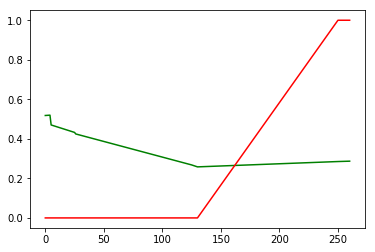

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


15.848931924611133
0.6309573444801942
Window: 0
[[102 340]
 [124 343]]
accuracy= 0.48954895489548955
1.0
0.01584893192461114
Window: 4
[[190 241]
 [276 201]]
accuracy= 0.43061674008810574
10000.0
0.01584893192461114
Window: 5
[[159 263]
 [215 271]]
accuracy= 0.473568281938326
1.0
0.01584893192461114
Window: 25
[[150 285]
 [170 299]]
accuracy= 0.49668141592920356
0.15848931924611143
0.6309573444801942
Window: 26
[[151 281]
 [217 255]]
accuracy= 0.4491150442477876
15.848931924611133
0.00039810717055349735
Window: 125
[[ 36 312]
 [ 92 444]]
accuracy= 0.5429864253393665
3.9810717055349722
0.01584893192461114
Window: 130
[[ 14 322]
 [ 54 493]]
accuracy= 0.5741789354473387
1.0
1000.0
Window: 250
[[  0 251]
 [  0 608]]
accuracy= 0.7077997671711292
251.18864315095797
25.11886431509582
Window: 260
[[  0 250]
 [  0 607]]
accuracy= 0.7082847141190198
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.48954895489548955, 0.43061674008810574, 0.473568281938326, 0.49668141592920356, 0.4491150442477876, 0.54298642533

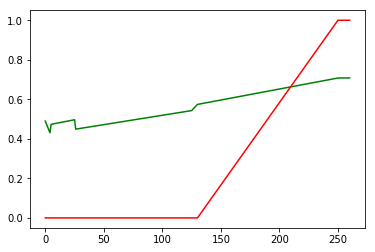

Working on... CMCSA
10000.0
1e-05
Window: 0
[[275 159]
 [284 191]]
accuracy= 0.5126512651265126
1000.0
0.00039810717055349735
Window: 4
[[191 249]
 [185 283]]
accuracy= 0.5220264317180616
1000.0
0.00039810717055349735
Window: 5
[[216 217]
 [229 246]]
accuracy= 0.5088105726872246
10000.0
1e-05
Window: 25
[[215 260]
 [121 308]]
accuracy= 0.5785398230088495
10000.0
1e-05
Window: 26
[[215 263]
 [125 301]]
accuracy= 0.5707964601769911
1000.0
1e-05
Window: 125
[[322 242]
 [168 152]]
accuracy= 0.5361990950226244
15.848931924611133
0.00039810717055349735
Window: 130
[[291 270]
 [150 172]]
accuracy= 0.5243488108720272
15.848931924611133
0.00039810717055349735
Window: 250
[[241 317]
 [102 199]]
accuracy= 0.5122235157159488
6.309573444801943
0.00039810717055349735
Window: 260
[[201 367]
 [ 83 206]]
accuracy= 0.4749124854142357
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5126512651265126, 0.5220264317180616, 0.5088105726872246, 0.5785398230088495, 0.5707964601769911, 0.5361990950226244, 0.5243488108720272, 0.5

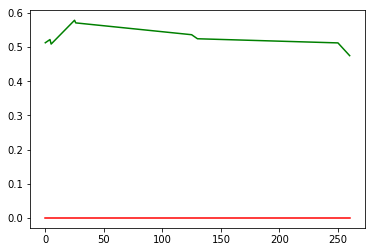

Working on... NVDA
251.18864315095797
0.6309573444801942
Window: 0
[[241 218]
 [223 227]]
accuracy= 0.5148514851485149
63.0957344480193
0.00039810717055349735
Window: 4
[[392  36]
 [423  57]]
accuracy= 0.4944933920704846
251.18864315095797
0.00039810717055349735
Window: 5
[[326 110]
 [343 129]]
accuracy= 0.501101321585903
15.848931924611133
0.00039810717055349735
Window: 25
[[347   3]
 [536  18]]
accuracy= 0.40376106194690264
6.309573444801943
0.01584893192461114
Window: 26
[[343  16]
 [524  21]]
accuracy= 0.4026548672566372
251.18864315095797
0.01584893192461114
Window: 125
[[217 152]
 [312 203]]
accuracy= 0.4751131221719457
251.18864315095823
0.01584893192461114
Window: 130
[[279  85]
 [360 159]]
accuracy= 0.4960362400906002
3.9810717055349722
25.11886431509582
Window: 250
[[  0 324]
 [  0 535]]
accuracy= 0.6228172293364377
10000.0
25.11886431509582
Window: 260
[[  0 322]
 [  0 535]]
accuracy= 0.6242707117852976
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.5148514851485149, 0.4944933920704846,

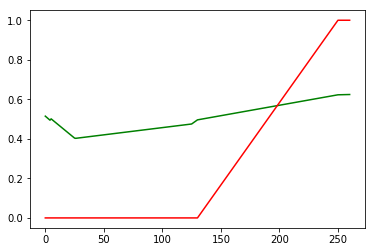

Working on... NFLX
1.0
1e-05
Window: 0
[[238 199]
 [259 213]]
accuracy= 0.4961496149614962
1000.0
0.01584893192461114
Window: 4
[[ 21 373]
 [ 23 491]]
accuracy= 0.5638766519823789
1.0
1e-05
Window: 5
[[248 145]
 [360 155]]
accuracy= 0.44383259911894274
6.309573444801943
1e-05
Window: 25
[[269  70]
 [506  59]]
accuracy= 0.36283185840707965
15.848931924611133
0.6309573444801942
Window: 26
[[ 19 322]
 [ 21 542]]
accuracy= 0.620575221238938
10000.0
25.11886431509582
Window: 125
[[  0 234]
 [  0 650]]
accuracy= 0.7352941176470589
0.0001
25.11886431509582
Window: 130
[[  0 238]
 [  0 645]]
accuracy= 0.7304643261608154
1.0
1000.0
Window: 250
[[  0 143]
 [  0 716]]
accuracy= 0.8335273573923166
1.0
1000.0
Window: 260
[[  0 136]
 [  0 721]]
accuracy= 0.8413068844807468
[0, 0, 0, 0, 0, 72, 72, 72, 72]
[0.4961496149614962, 0.5638766519823789, 0.44383259911894274, 0.36283185840707965, 0.620575221238938, 0.7352941176470589, 0.7304643261608154, 0.8335273573923166, 0.8413068844807468]
accuracy


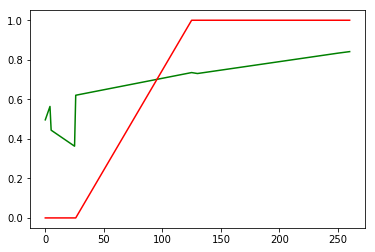

Working on... ADBE
63.0957344480193
0.00039810717055349735
Window: 0
[[225 194]
 [250 240]]
accuracy= 0.5115511551155115
251.18864315095823
0.00039810717055349735
Window: 4
[[261 165]
 [309 173]]
accuracy= 0.4779735682819383
0.15848931924611143
0.6309573444801942
Window: 5
[[170 252]
 [198 288]]
accuracy= 0.5044052863436124
0.0001
0.6309573444801942
Window: 25
[[252 147]
 [321 184]]
accuracy= 0.4823008849557522
0.003981071705534973
0.6309573444801942
Window: 26
[[272 133]
 [350 149]]
accuracy= 0.4657079646017699
63.0957344480193
25.11886431509582
Window: 125
[[  0 298]
 [  0 586]]
accuracy= 0.6628959276018099
63.0957344480193
25.11886431509582
Window: 130
[[  0 286]
 [  0 597]]
accuracy= 0.6761041902604756
1.0
1000.0
Window: 250
[[  0 227]
 [  0 632]]
accuracy= 0.7357392316647264
1.0
1000.0
Window: 260
[[  0 225]
 [  0 632]]
accuracy= 0.7374562427071178
[0, 0, 0, 0, 0, 72, 72, 72, 144]
[0.5115511551155115, 0.4779735682819383, 0.5044052863436124, 0.4823008849557522, 0.4657079646017699, 

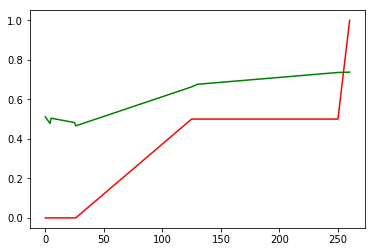

Working on... AMGN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1000.0
0.01584893192461114
Window: 0
[[234 220]
 [212 243]]
accuracy= 0.5247524752475248
10000.0
0.01584893192461114
Window: 4
[[186 236]
 [210 276]]
accuracy= 0.5088105726872246
6.309573444801943
0.6309573444801942
Window: 5
[[217 200]
 [251 240]]
accuracy= 0.5033039647577092
251.18864315095823
0.01584893192461114
Window: 25
[[325 103]
 [372 104]]
accuracy= 0.4745575221238938
251.18864315095797
0.01584893192461114
Window: 26
[[322 106]
 [365 110]]
accuracy= 0.47840531561461797
0.0001
0.01584893192461114
Window: 125
[[246  96]
 [421 121]]
accuracy= 0.415158371040724
0.15848931924611143
1e-05
Window: 130
[[227 119]
 [404 133]]
accuracy= 0.40770101925254815
3.9810717055349722
0.00039810717055349735
Window: 250
[[322  23]
 [402 112]]
accuracy= 0.5052386495925495
15.848931924611133
1e-05


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 260
[[339   0]
 [518   0]]
accuracy= 0.39556592765460913
[0, 0, 0, 0, 0, 0, 0, 72, 72]
[0.5247524752475248, 0.5088105726872246, 0.5033039647577092, 0.4745575221238938, 0.47840531561461797, 0.415158371040724, 0.40770101925254815, 0.5052386495925495, 0.39556592765460913]
accuracy


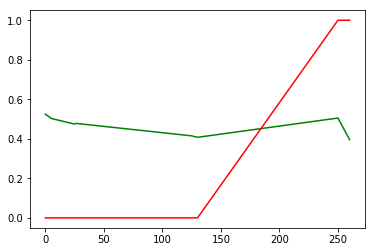

Working on... TXN
1.0
0.6309573444801942
Window: 0
[[152 290]
 [161 300]]
accuracy= 0.5005537098560354
3.9810717055349722
0.00039810717055349735
Window: 4
[[204 223]
 [229 247]]
accuracy= 0.4994462901439646
0.0001
0.00039810717055349735
Window: 5
[[175 248]
 [206 273]]
accuracy= 0.49667405764966743
10000.0
0.01584893192461114
Window: 25
[[ 89 337]
 [133 339]]
accuracy= 0.4766146993318486
251.18864315095823
0.01584893192461114
Window: 26
[[ 76 346]
 [166 310]]
accuracy= 0.4298440979955457
1.0
25.11886431509582
Window: 125
[[  0 456]
 [  0 422]]
accuracy= 0.4806378132118451
1.0
25.11886431509582
Window: 130
[[  0 454]
 [  0 423]]
accuracy= 0.4823261117445838
251.18864315095823
25.11886431509582
Window: 250
[[  0 417]
 [  0 436]]
accuracy= 0.511137162954279
1.0
1000.0
Window: 260
[[  0 426]
 [  0 425]]
accuracy= 0.4994124559341951
[0, 0, 0, 0, 0, 144, 72, 216, 216]
[0.5005537098560354, 0.4994462901439646, 0.49667405764966743, 0.4766146993318486, 0.4298440979955457, 0.4806378132118451, 0.4

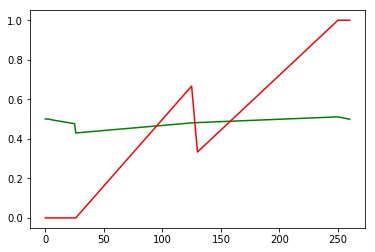

Working on... AVGO
251.18864315095823
0.01584893192461114
Window: 0
[[194 251]
 [206 258]]
accuracy= 0.49724972497249725
10000.0
1e-05
Window: 4
[[193 270]
 [189 256]]
accuracy= 0.4944933920704846
10000.0
0.00039810717055349735
Window: 5
[[154 304]
 [167 283]]
accuracy= 0.4812775330396476
63.0957344480193
0.00039810717055349735
Window: 25
[[148 316]
 [154 286]]
accuracy= 0.48008849557522126
251.18864315095797
0.00039810717055349735
Window: 26
[[155 313]
 [160 276]]
accuracy= 0.47676991150442477
15.848931924611133
0.00039810717055349735
Window: 125
[[190 346]
 [ 66 282]]
accuracy= 0.5339366515837104
15.848931924611133
0.00039810717055349735
Window: 130
[[204 342]
 [ 76 261]]
accuracy= 0.5266138165345413
15.848931924611133
0.00039810717055349735
Window: 250
[[190 382]
 [ 70 217]]
accuracy= 0.47380675203725264
1000.0
1e-05
Window: 260
[[271 283]
 [ 53 250]]
accuracy= 0.6079346557759626
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.49724972497249725, 0.4944933920704846, 0.4812775330396476, 0.480088495575

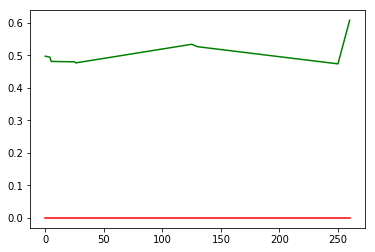

Working on... PYPL
10000.0
0.01584893192461114
Window: 0
[[201 235]
 [236 237]]
accuracy= 0.48184818481848185
6.309573444801943
0.01584893192461114
Window: 4
[[300 126]
 [304 178]]
accuracy= 0.526431718061674
251.18864315095823
1e-05
Window: 5
[[323  81]
 [350 154]]
accuracy= 0.525330396475771
251.18864315095823
1e-05
Window: 25
[[247 148]
 [302 207]]
accuracy= 0.5022123893805309
6.309573444801943
0.00039810717055349735
Window: 26
[[230 154]
 [306 214]]
accuracy= 0.4911504424778761
63.0957344480193
0.00039810717055349735
Window: 125
[[344   0]
 [538   2]]
accuracy= 0.3914027149321267
251.18864315095797
1e-05


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 130
[[345   0]
 [538   0]]
accuracy= 0.39071347678369195
1.0
0.6309573444801942
Window: 250
[[284  34]
 [428 113]]
accuracy= 0.46216530849825377
6.309573444801943
0.6309573444801942
Window: 260
[[284  36]
 [361 176]]
accuracy= 0.5367561260210035
[0, 0, 0, 0, 0, 0, 0, 144, 144]
[0.48184818481848185, 0.526431718061674, 0.525330396475771, 0.5022123893805309, 0.4911504424778761, 0.3914027149321267, 0.39071347678369195, 0.46216530849825377, 0.5367561260210035]
accuracy


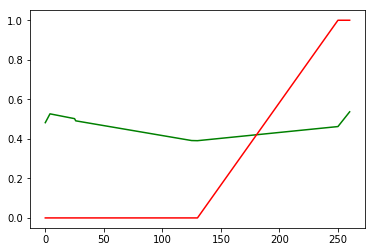

Working on... GILD


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


251.18864315095797
0.01584893192461114
Window: 0
[[283 175]
 [258 193]]
accuracy= 0.5236523652365237
15.848931924611133
0.01584893192461114
Window: 4
[[250 216]
 [232 210]]
accuracy= 0.5066079295154186
251.18864315095797
0.01584893192461114
Window: 5
[[263 213]
 [229 203]]
accuracy= 0.513215859030837
10000.0
0.00039810717055349735
Window: 25
[[483  40]
 [332  49]]
accuracy= 0.588495575221239
10000.0
0.00039810717055349735
Window: 26
[[497  31]
 [333  43]]
accuracy= 0.5973451327433629
0.15848931924611143
0.01584893192461114
Window: 125
[[363  91]
 [377  53]]
accuracy= 0.47058823529411764
0.15848931924611143
0.01584893192461114
Window: 130
[[366  92]
 [370  55]]
accuracy= 0.47678369195922987
0.15848931924611143
0.00039810717055349735


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 250
[[394   0]
 [465   0]]
accuracy= 0.4586728754365541
0.003981071705534973
0.00039810717055349735


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Window: 260
[[405   0]
 [452   0]]
accuracy= 0.4725787631271879
[0, 0, 0, 0, 0, 0, 0, 144, 144]
[0.5236523652365237, 0.5066079295154186, 0.513215859030837, 0.588495575221239, 0.5973451327433629, 0.47058823529411764, 0.47678369195922987, 0.4586728754365541, 0.4725787631271879]
accuracy


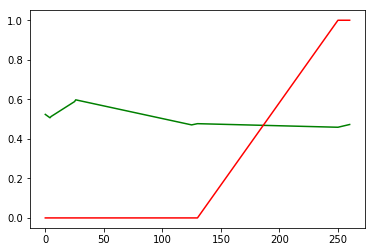

Working on... COST
3.9810717055349722
0.6309573444801942
Window: 0
[[248 190]
 [285 186]]
accuracy= 0.47744774477447743
3.9810717055349722
0.6309573444801942
Window: 4
[[255 173]
 [301 179]]
accuracy= 0.4779735682819383
1.0
0.6309573444801942
Window: 5
[[323 107]
 [360 118]]
accuracy= 0.4856828193832599
1.0
0.6309573444801942
Window: 25
[[291 158]
 [283 172]]
accuracy= 0.5121681415929203
1.0
0.6309573444801942
Window: 26
[[293 160]
 [287 164]]
accuracy= 0.5055309734513275
10000.0
0.01584893192461114
Window: 125
[[122 247]
 [175 340]]
accuracy= 0.5226244343891403
0.15848931924611143
1e-05
Window: 130
[[185 161]
 [224 313]]
accuracy= 0.5639864099660249
3.9810717055349722
25.11886431509582
Window: 250
[[  0 316]
 [  0 543]]
accuracy= 0.6321303841676368
63.0957344480193
25.11886431509582
Window: 260
[[  0 318]
 [  0 539]]
accuracy= 0.6289381563593932
[0, 0, 0, 0, 0, 0, 0, 144, 144]
[0.47744774477447743, 0.4779735682819383, 0.4856828193832599, 0.5121681415929203, 0.5055309734513275, 0.52262

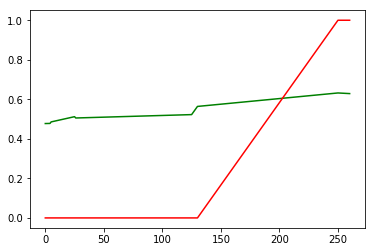

Working on... QCOM


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.003981071705534973
0.01584893192461114
Window: 0
[[156 282]
 [179 292]]
accuracy= 0.49284928492849284
0.0001
0.6309573444801942
Window: 4
[[157 300]
 [169 282]]
accuracy= 0.4834801762114537
1000.0
1e-05
Window: 5
[[192 267]
 [200 249]]
accuracy= 0.4856828193832599
10000.0
0.01584893192461114
Window: 25
[[227 309]
 [132 236]]
accuracy= 0.5121681415929203
15.848931924611133
0.6309573444801942
Window: 26
[[242 298]
 [155 209]]
accuracy= 0.49889380530973454
1000.0
0.00039810717055349735
Window: 125
[[241 253]
 [136 254]]
accuracy= 0.5599547511312217
1000.0
0.00039810717055349735
Window: 130
[[234 247]
 [126 276]]
accuracy= 0.5775764439411099
0.003981071705534973
0.6309573444801942
Window: 250
[[231 281]
 [128 219]]
accuracy= 0.5238649592549476
0.003981071705534973
0.6309573444801942
Window: 260
[[151 378]
 [ 92 236]]
accuracy= 0.4515752625437573
[0, 0, 0, 0, 0, 0, 0, 72, 72]
[0.49284928492849284, 0.4834801762114537, 0.4856828193832599, 0.5121681415929203, 0.49889380530973454, 0.559954751

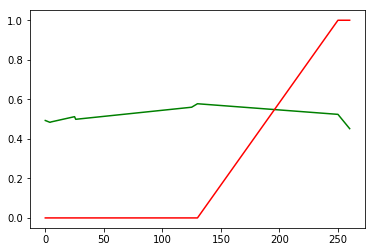

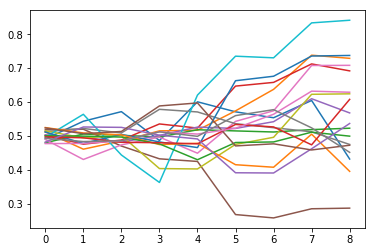

In [3]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,4,5,25,26,125,130,250,260]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,6)),np.logspace(-4,4,6)))
        gspace=np.logspace(-5,3,6)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        print(maxc)
        print(maxg)
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        CM = f1_score(y_test, prediction)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        olwaysup = sum(y_test)/len(y_test)
        valueacc=rbf_svm.score(x_test,y_test)
        print('accuracy=',valueacc)
        #print('Accuracy on TEST set:',testacc
        
        #print('F1,score',CM)
        #print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [4]:
tempacc=accstocksresults

In [5]:
print(len(tempacc))

18


In [6]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    t=np.add(t,tempacc[i])
print(t)
print(t/len(tempacc))


[ 9.02939453  8.98793329  8.92149683  8.83846488  9.09673216  9.42405554
  9.58786235 10.44821704 10.20955217]
[0.50163303 0.49932963 0.49563871 0.49102583 0.50537401 0.52355864
 0.53265902 0.5804565  0.56719734]


[0.52282555 0.53986176 0.54463966 0.54846378 0.56177553 0.58579719
 0.59445897 0.59920915 0.5909525  0.58121757 0.59267087 0.59938036
 0.59060086 0.58884745 0.55975116 0.53407032 0.52909452 0.54840958
 0.57406494 0.60228516 0.62788511 0.65007699 0.68774144 0.73405107
 0.70384762]


ValueError: x and y must have same first dimension, but have shapes (9,) and (25,)

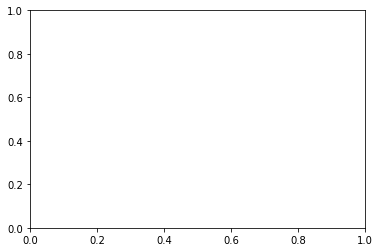

In [7]:
aapl=[0.5243506493506493, 0.5340909090909091, 0.5203252032520326, 0.5040650406504065, 0.4926590538336052, 0.5179738562091504, 0.5229508196721312, 0.5279605263157895, 0.512396694214876, 0.494195688225539, 0.4757929883138564, 0.4991624790619765, 0.5050505050505051, 0.5050675675675675, 0.4634974533106961, 0.40683760683760684, 0.39862542955326463, 0.43350604490500866, 0.4722222222222222, 0.5008726003490401, 0.6285211267605634, 0.6194690265486725, 0.5385996409335727, 0.5685557586837294, 0.515828677839851]
adbe=[0.5498575498575499, 0.5698005698005698, 0.5783475783475783, 0.609129814550642, 0.6442857142857142, 0.6575931232091691, 0.6752873563218391, 0.6772334293948127, 0.6734104046242775, 0.6652173913043479, 0.6802919708029197, 0.6881405563689604, 0.7147058823529412, 0.7684365781710915, 0.7911111111111111, 0.8002980625931445, 0.7754491017964071, 0.7894736842105263, 0.8187311178247734, 0.8634294385432474, 0.8929663608562691, 0.9139784946236559, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.5213675213675214, 0.5341880341880342, 0.550641940085592, 0.5428571428571428, 0.5436337625178826, 0.5974212034383954, 0.5862068965517241, 0.579250720461095, 0.6034732272069464, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.4879518072289157, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.5514018691588785, 0.7215189873417721, 0.6270096463022508]
googl=[0.49572649572649574, 0.5213675213675214, 0.5292439372325249, 0.5378031383737518, 0.5665236051502146, 0.5702005730659025, 0.5933908045977011, 0.6123919308357348, 0.5745296671490593, 0.5761973875181422, 0.6262773722627737, 0.6310395314787701, 0.5985294117647059, 0.5634218289085545, 0.5170370370370371, 0.47242921013412814, 0.48353293413173654, 0.48270676691729325, 0.49244712990936557, 0.496206373292868, 0.4954128440366973, 0.5407066052227343, 0.671850699844479, 0.6524486571879937, 0.6725521669341894]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
a=100000000
teta=0.5
p=np.random.gamma(a,teta,1000)
plt.plot(p)
plt.show()